In [5]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

# Eliminar Variables Irrelevantes


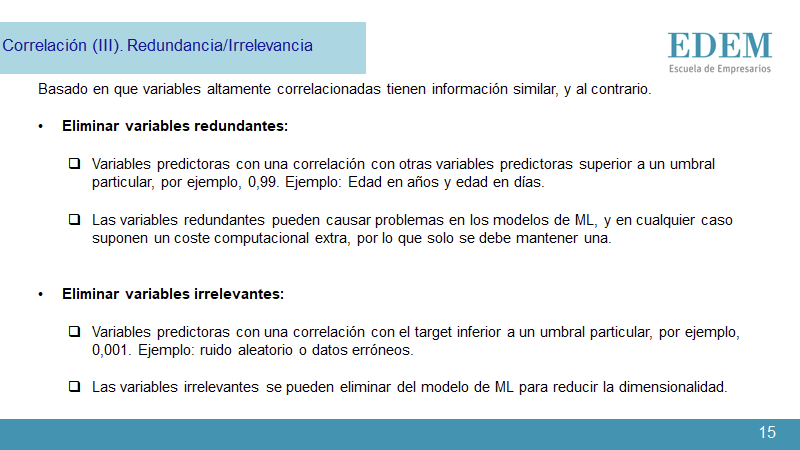

Cuando se abordan problemas de aprendizaje supervisado, se pueden encontrar en el conjunto de datos variables que no son informativas ni están relacionadas con el objetivo que queremos predecir. Estas variables no son útiles para las predicciones del modelo y suelen denominarse variables irrelevantes.

Para reducir los costes computacionales y de memoria, así como para disminuir el ruido en los datos, es aconsejable eliminarlas del conjunto de datos.

## Load Data

In [6]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat.head()

,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,online,NaN,i2
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2


## ¿Qué es una variable irrelevante?

Hay varias formas de entender qué es una variable irrelevante. No obstante, normalmente el criterio para marcar una variable como irrelevante se basa en que dicha variable no alcance un umbral mínimo de correlación con el objetivo que queremos predecir.



## Detectar Variables Irrelevantes 

Basándonos en nuestra definición anterior, primero tenemos que calcular las correlaciones de cada variable con respecto al objetivo. 

In [7]:
cor = dat.corr()
cor

,price,ant
price,1.000000,-0.012836
ant,-0.012836,1.000000


Vamos a añadir una nueva columna aleatoria al conjunto de datos.


In [13]:
dat['noise'] = np.random.random(dat.shape[0])
dat

,user,booking_date,origin_airport,price,sales channel,ant,airline,noise
0,user5,01/11/2018,MAD,NaN,online,NaN,i2,0.677366
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2,0.520293
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2,0.672513
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2,0.380698
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2,0.572897
...,...,...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,NaN,online,29.0,i2,0.020711
996,user10,01/11/2018,SVQ,NaN,online,39.0,i2,0.769694
997,user4,30/10/2018,MAD,NaN,online,5.0,i2,0.280389
998,user10,02/11/2018,CDG,NaN,online,4.0,i2,0.253611


Y calculamos otra vez la matriz de correlaciones.

In [14]:
cor = dat.corr()
cor

,price,ant,noise
price,1.000000,-0.012836,-0.024645
ant,-0.012836,1.000000,-0.005572
noise,-0.024645,-0.005572,1.000000


Vamos a saber que nuestra variable objetivo a predecir es *ant*.

In [15]:
target = 'ant'
cor = cor[target]
cor

price   -0.012836
ant      1.000000
noise   -0.005572
Name: ant, dtype: float64

Por último, definamos un umbral mínimo de correlación y detectemos las variables que caen por debajo de él.

In [17]:
threshold = 0.01
# threshold = 0.05
irrelevant_variables = cor.index[np.abs(cor.values) < threshold].tolist()
irrelevant_variables

['noise']

Juntando todos los pasos.

In [27]:
cor = dat.corr()
cor = cor[target]
irrelevant_variables = cor.index[np.abs(cor.values) < threshold].tolist()
irrelevant_variables

['price', 'noise']

## Definir Función

In [18]:
def irrelevant_variables(X, target, threshold = 0.05):
    cor = X.corr()
    cor = cor[target]
    irrelevant_vars = cor.index[np.abs(cor.values) < threshold].tolist()    
    X = X.drop(irrelevant_vars, axis = 1)
    print('Variables ' + str(irrelevant_vars) + ' have been removed from dataset.')
    return X

In [19]:
dat_new = irrelevant_variables(dat, 'ant')
dat_new

Variables ['price', 'noise'] have been removed from dataset.


,user,booking_date,origin_airport,sales channel,ant,airline
0,user5,01/11/2018,MAD,online,NaN,i2
1,user7,01/11/2018,DUB,online,38.0,i2
2,user4,02/11/2018,TFS,online,19.0,i2
3,user8,29/10/2018,MAD,online,8.0,i2
4,user7,01/11/2018,NaN,call center,4.0,i2
...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,online,29.0,i2
996,user10,01/11/2018,SVQ,online,39.0,i2
997,user4,30/10/2018,MAD,online,5.0,i2
998,user10,02/11/2018,CDG,online,4.0,i2


In [22]:
dat_new = irrelevant_variables(dat, 'price', threshold = 0.1)
dat_new

Variables ['ant', 'noise'] have been removed from dataset.


,user,booking_date,origin_airport,price,sales channel,airline
0,user5,01/11/2018,MAD,NaN,online,i2
1,user7,01/11/2018,DUB,147.500000,online,i2
2,user4,02/11/2018,TFS,24.049999,online,i2
3,user8,29/10/2018,MAD,59.709999,online,i2
4,user7,01/11/2018,NaN,37.299999,call center,i2
...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,NaN,online,i2
996,user10,01/11/2018,SVQ,NaN,online,i2
997,user4,30/10/2018,MAD,NaN,online,i2
998,user10,02/11/2018,CDG,NaN,online,i2
